In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
img_size = 256
Batch_size=32
Channels = 3
Epochs=50

In [4]:
ds=tf.keras.preprocessing.image_dataset_from_directory(
    "planthouse",
    shuffle = True,
    image_size = (img_size,img_size),
    batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = ds.class_names

In [6]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(ds)

68

In [8]:
for img_batch,label_batch in ds.take(1):
    print(img_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1]


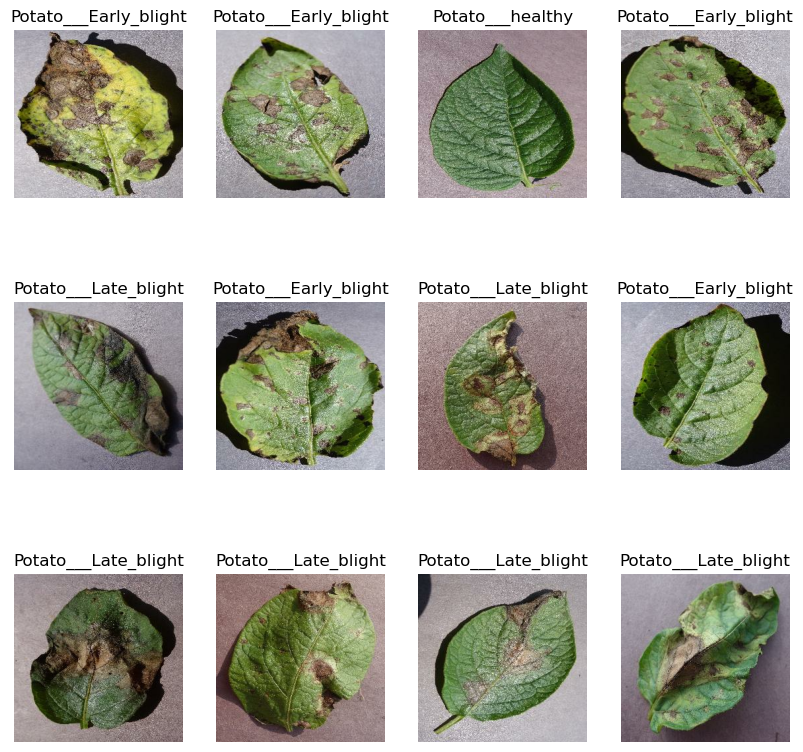

In [9]:
plt.figure(figsize=(10,10))
for img_batch,label_batch in ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
train_size =0.8
len(ds)*train_size


54.400000000000006

In [11]:
train_ds =ds.take(54)

In [12]:
test_ds = ds.skip(54)
len(test_ds)

14

In [13]:
val_size=0.1
len(ds)*val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6)

In [15]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_ds_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=get_ds_partition(ds)

In [18]:
len(train_ds)


54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
input_shape = (Batch_size,img_size, img_size, Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 95s 2s/step - loss: 0.8894 - accuracy: 0.5168 - val_loss: 0.7285 - val_accuracy: 0.6979
Epoch 2/50
54/54 [==============================] - 82s 2s/step - loss: 0.6315 - accuracy: 0.7361 - val_loss: 0.5310 - val_accuracy: 0.7969
Epoch 3/50
54/54 [==============================] - 86s 2s/step - loss: 0.4202 - accuracy: 0.8194 - val_loss: 0.3443 - val_accuracy: 0.8958
Epoch 4/50
54/54 [==============================] - 79s 1s/step - loss: 0.2863 - accuracy: 0.8848 - val_loss: 0.2856 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 77s 1s/step - loss: 0.2589 - accuracy: 0.9005 - val_loss: 0.2141 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 84s 2s/step - loss: 0.2136 - accuracy: 0.9207 - val_loss: 0.1268 - val_accuracy: 0.9479
Epoch 7/50
54/54 [==============================] - 92s 2s/step - loss: 0.1368 - accuracy: 0.9479 - val_loss: 0.0831 - val_accuracy: 0.9688
Epoch 8/50
54/54 [==

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 373ms/step - loss: 0.0895 - accuracy: 0.9922


In [32]:
scores

[0.0895388275384903, 0.9921875]

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
history.history['accuracy']

[0.5167824029922485,
 0.7361111044883728,
 0.8194444179534912,
 0.8848379850387573,
 0.9004629850387573,
 0.9207175970077515,
 0.9479166865348816,
 0.9548611044883728,
 0.9473379850387573,
 0.9554398059844971,
 0.9560185074806213,
 0.9658564925193787,
 0.9849537014961243,
 0.9635416865348816,
 0.9467592835426331,
 0.9722222089767456,
 0.9890046119689941,
 0.9890046119689941,
 0.9959490895271301,
 0.9803240895271301,
 0.9872685074806213,
 0.9809027910232544,
 0.9814814925193787,
 0.9947916865348816,
 0.9814814925193787,
 0.9895833134651184,
 0.984375,
 0.9918981194496155,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

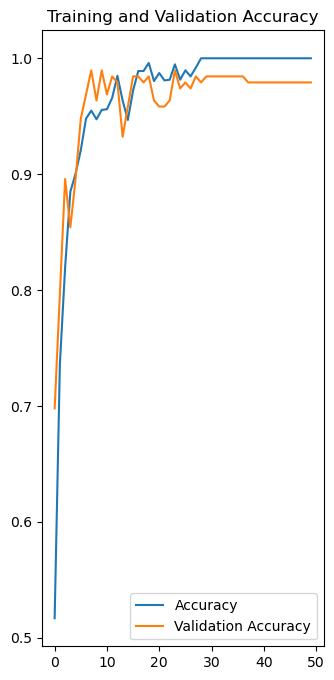

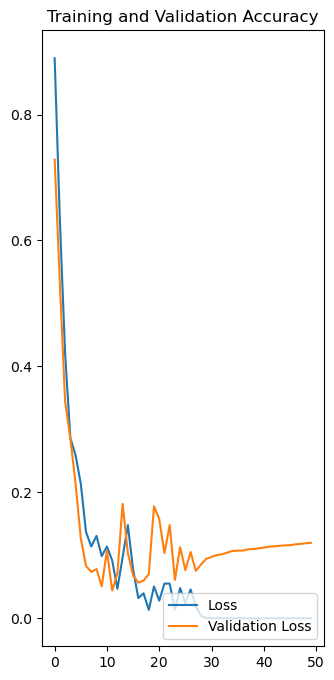

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='Accuracy')
plt.plot(range(Epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),loss,label='Loss')
plt.plot(range(Epochs),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

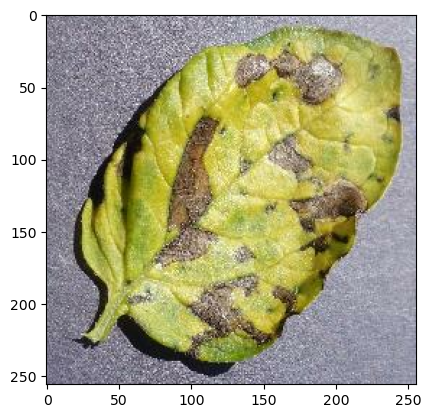

In [47]:
for img_batch,labels_batch in test_ds.take(1):
    #print(img_batch[0].numpy().astype('uint8'))
    plt.imshow(img_batch[0].numpy().astype('uint8'))

1st img to predict
actual label 0
1/1 [==============================] - 0s 357ms/step
0


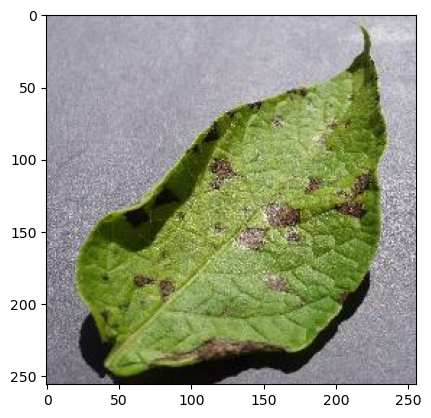

In [55]:
import numpy as np
for img_batch,labels_batch in test_ds.take(1):
    first_img = img_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("1st img to predict")
    plt.imshow(first_img)
    print("actual label",first_label.numpy())
    batch_pred=model.predict(img_batch)
    print(np.argmax(batch_pred[0]))

In [70]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


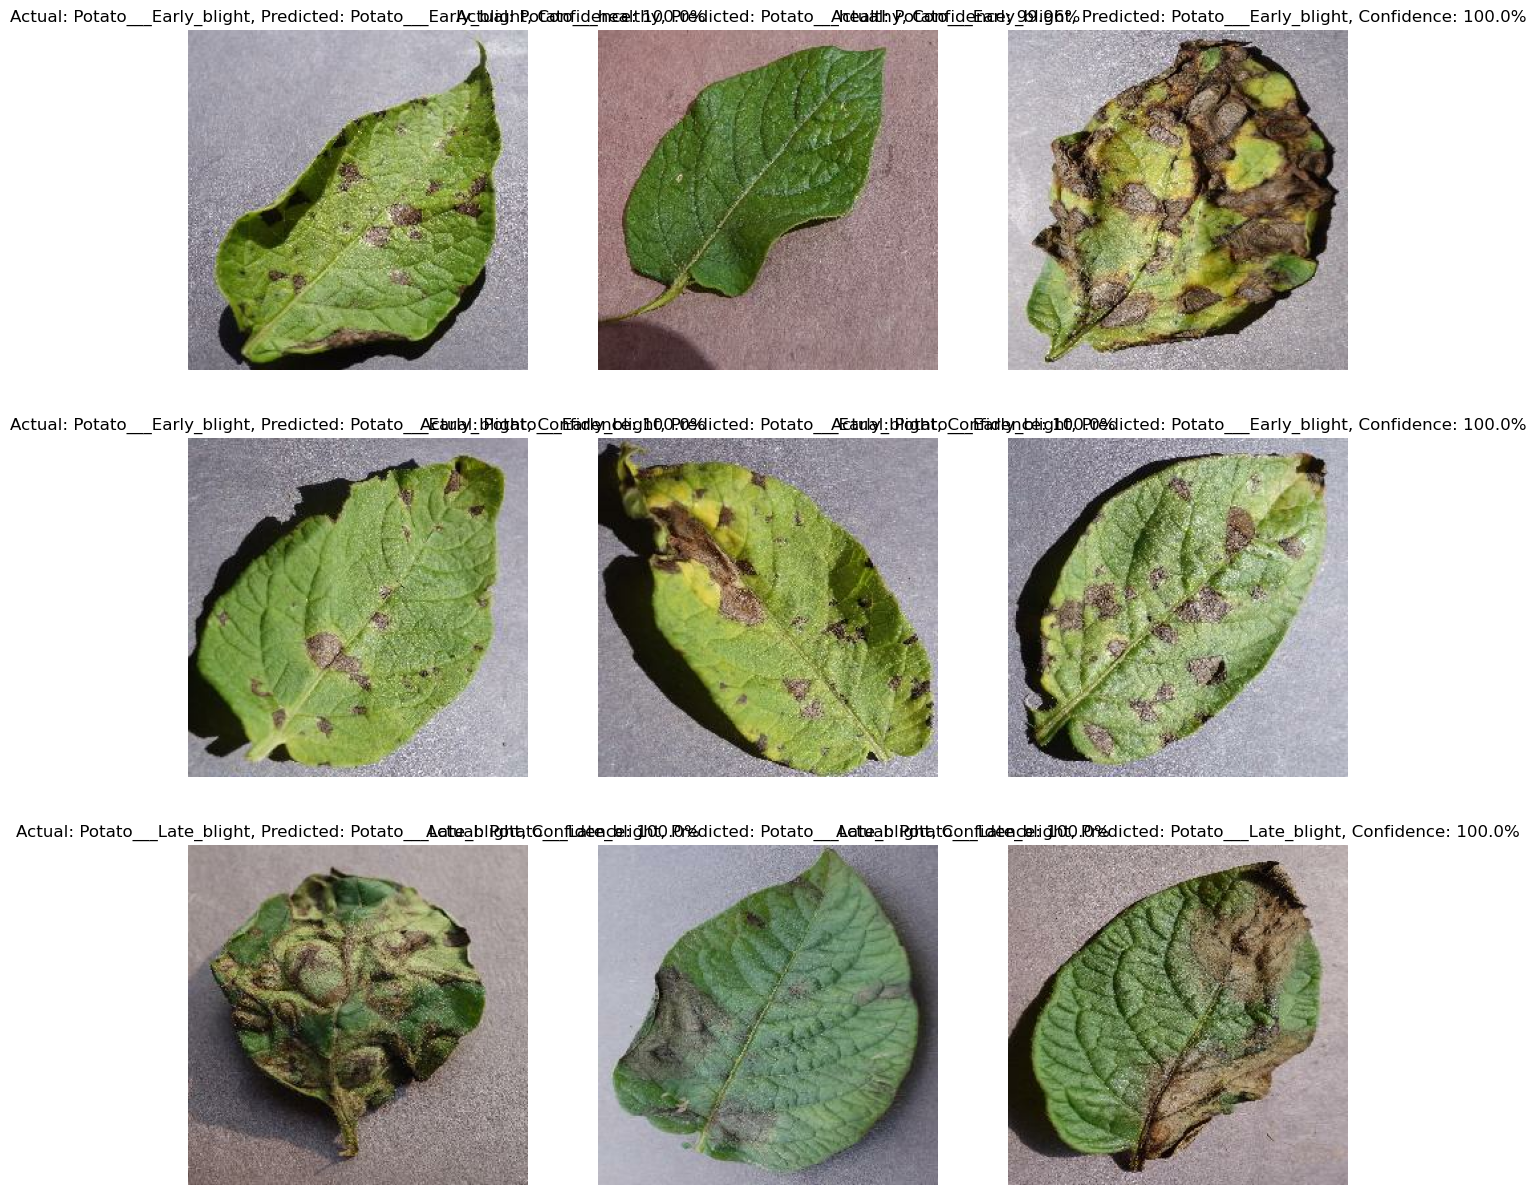

In [71]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])  # Use images[i] instead of img[i].numpy()
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}, Confidence: {confidence}%")
        
        plt.axis("off")